# ACSE-3 (Numerical Methods) 
## Coursework

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Coursework Q1
## Implement RK2 family

### (1)
### Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5.

RK2 (alpha = 1) agrees with result from Improved Euler : True


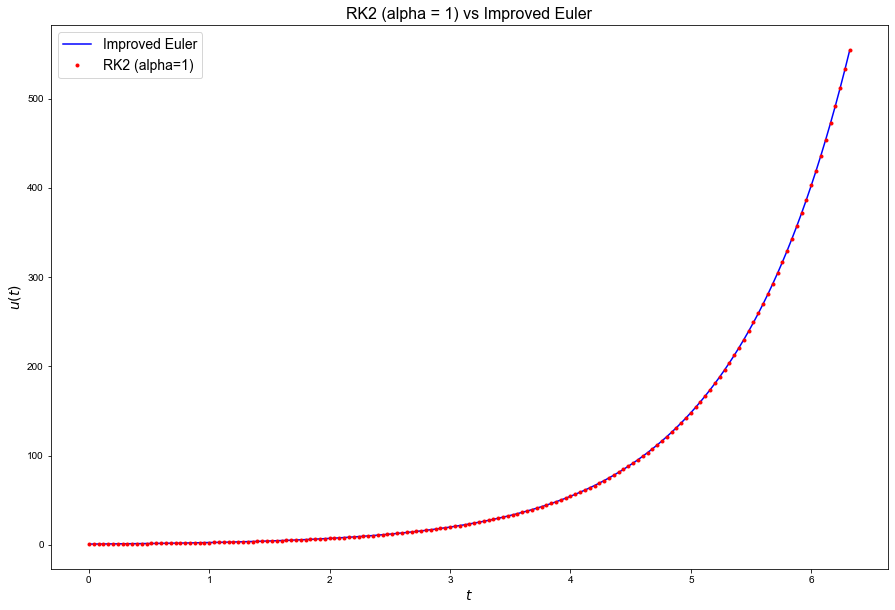

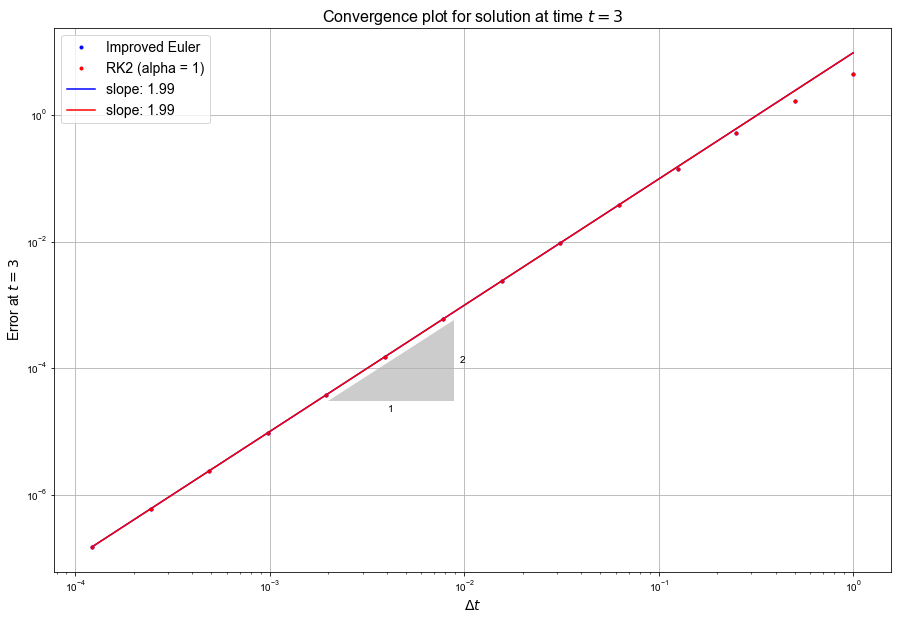

In [2]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + alpha*dt, y + alpha*k1)
        y = y + (1-1/(2*alpha))*k1 +1/(2*alpha)*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        star = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, star) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f(t, y):
    val = y
    return val

dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

uall_im, tall = improved_euler(f, y0, t0, tf, dt)
ax1.plot(tall, uall_im, 'b', label='Improved Euler')


uall_RK2_alpha, tall = RK2_alpha(f, y0, t0, tf, dt, alpha=1)
ax1.plot(tall, uall_RK2_alpha, 'r.', label='RK2 (alpha=1)')


ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('RK2 (alpha = 1) vs Improved Euler', fontsize=16) 
ax1.legend(loc='best', fontsize=14)

def approx_error_n(dt, t_max):
    
    uall, tall = improved_euler(f, y0, t0, t_max, dt)
    err1 = abs(uall[-1]-np.exp(t_max))
    
    uall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha=1)
    err2 = abs(uall[-1]-np.exp(t_max))
    
    return err1, err2


error_ie = []
error_RK2_1 = []
dt_array = []
dt = 1

while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error_n(dt, 3)
    error_ie.append(err1)
    error_RK2_1.append(err2)
    dt *= 0.5
    
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))


ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_RK2_1, 'r.', label='RK2 (alpha = 1)')


ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for solution at time $t=3$', fontsize=16)
ax1.grid(True)

annotation.slope_marker((2e-3, 3e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

start_fit = 4


line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_1[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_1[1]) * dt_array**(line_fit_1[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_1[0]))


ax1.legend(loc='best', fontsize=14);

print('RK2 (alpha = 1) agrees with result from Improved Euler :', np.allclose(uall_RK2_alpha, uall_im,rtol=1e-02,atol=20))

#### " Comments: "
#### From these two grahps and legend we can see that Improved Euler and RK2  $\alpha$(1) are basically coincident.

### (2)
###  Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions. Consider a simple error metric given by the error in the solution at time $t=3$. Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

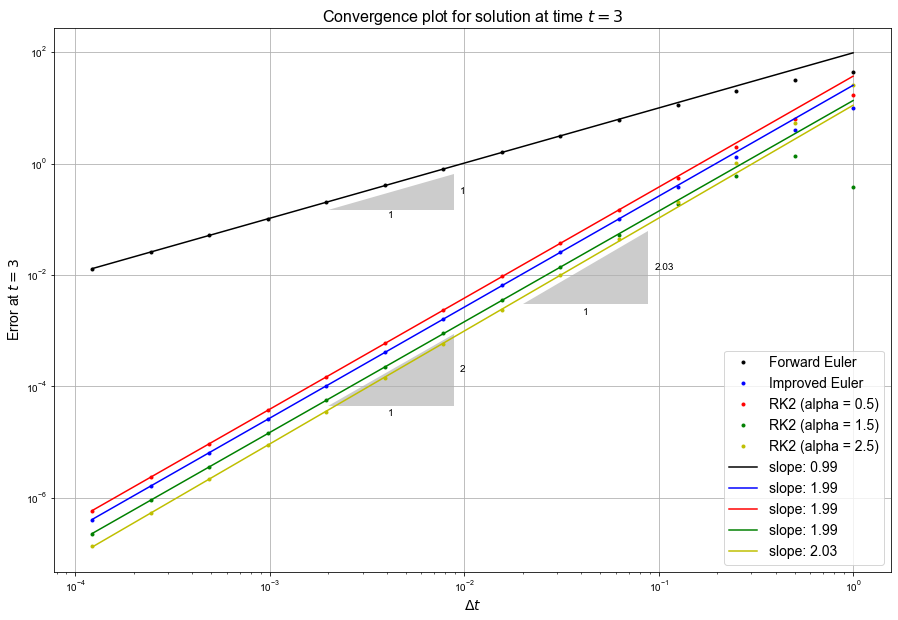

In [3]:
def f_max(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

dt = 0.04
y0 = 1.0
t0 = 0.0


def approx_error1(dt, t_max):
    
    uall, tall = forward_euler(f_max, y0, t0, t_max, dt)
    err1 = abs(uall[-1]-y_ex(t_max))
    
    uall, tall = improved_euler(f_max, y0, t0, t_max, dt)
    err2 = abs(uall[-1]-y_ex(t_max))
    
    uall, tall = RK2_alpha(f_max, y0, t0, t_max, dt, alpha=0.5)
    err3 = abs(uall[-1]-y_ex(t_max))
    
    uall, tall = RK2_alpha(f_max, y0, t0, t_max, dt, alpha=1.5)
    err4 = abs(uall[-1]-y_ex(t_max))
    
    uall, tall = RK2_alpha(f_max, y0, t0, t_max, dt, alpha=2.5)
    err5 = abs(uall[-1]-y_ex(t_max))
    
    return err1, err2, err3, err4, err5


error_fe = []
error_ie = []
error_RK2_0 = []
error_RK2_1 = []
error_RK2_2 = []
dt_array = []
dt = 1

while dt > 1.e-4:
    dt_array.append(dt)
    
    err1, err2, err3, err4, err5 = approx_error1(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_RK2_0.append(err3)
    error_RK2_1.append(err4)
    error_RK2_2.append(err5)
    dt *= 0.5
    
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_RK2_0, 'r.', label='RK2 (alpha = 0.5)')
ax1.loglog(dt_array, error_RK2_1, 'g.', label='RK2 (alpha = 1.5)')
ax1.loglog(dt_array, error_RK2_2, 'y.', label='RK2 (alpha = 2.5)')

ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for solution at time $t=3$', fontsize=16)
ax1.grid(True)

annotation.slope_marker((2e-3, 1.5e-1), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4.5e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-2, 3e-3), (2.03, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_0 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_0[start_fit:]), 1)
line_fit_1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_1[start_fit:]), 1)
line_fit_2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_2[start_fit:]), 1)


ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_0[1]) * dt_array**(line_fit_0[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_0[0]))
ax1.loglog(dt_array, np.exp(line_fit_1[1]) * dt_array**(line_fit_1[0]), 'g-', label = 'slope: {:.2f}'.format(line_fit_1[0]))
ax1.loglog(dt_array, np.exp(line_fit_2[1]) * dt_array**(line_fit_2[0]), 'y-', label = 'slope: {:.2f}'.format(line_fit_2[0]))


ax1.legend(loc='best', fontsize=14);

#### " Comments: "
#### We choose three different values of  $\alpha$: 0.5, 1.5 and 2.5.
#### From the graph and legend we can see that Forward Euler is first order of convergence.
#### Improved Euler, RK2  $\alpha$(0.5) and RK2  $\alpha$(1.5) are second order of convergence.
#### While for RK2  $\alpha$(2.5), it is more accurate than second order of convergence. 

### (3)
###  For a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$. What is the optimal value of $\alpha$ which minimises the error for this problem?

The optimal value of alpha which minimises the global error is : 2.099999999999999


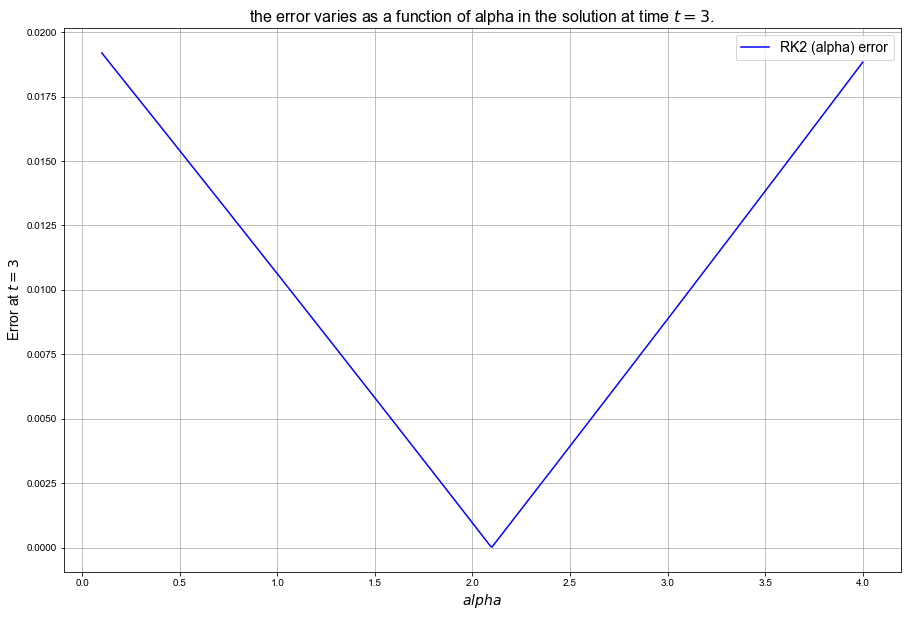

In [4]:
#alpha = np.arange(0.1, 4.0, 0.1)

def approx_error(f, y0, t0, t_max, dt, alpha):

    uall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    err2 = abs(uall[-1]-y_ex(t_max))
    return err2

dt = 0.02
y0 = 1.0
t0 = 0.0
t_max = 3


alpha_list = []

error_RK2 = []
alpha = 0.1
while alpha <= 4:
    alpha_list.append(alpha)

    err2 = approx_error(f_max, y0, t0, t_max, dt, alpha)
    
    error_RK2.append(err2)
    alpha += 0.01
    

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))


ax1.plot(alpha_list, error_RK2, 'b', label='RK2 (alpha) error')   

ax1.set_xlabel('$alpha$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('the error varies as a function of alpha in the solution at time $t=3$.', fontsize=16) 
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

print("The optimal value of alpha which minimises the global error is :", alpha_list[np.argmin(error_RK2[:])])

#### " Comments: "
#### We choose a fixed time step size is 0.02
#### From the graph we can see the optimal value of  𝛼  which minimises the global error is around 2.1.

## Coursework Q2 
## Implementing backward Euler using a nonlinear system solver

### (1)
### Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

" Answer: "

We can write backward Euler as: $$y_{n+1} - y_{n} -\Delta tf(t_{n+1},y_{n+1}) = 0$$

However, it is difficult for us to obtain $y_{n+1}$ directly as the method is implicit when we just input  $y_{n}$.

Therefore, we can define: $$F(y^{k+1}) = y^{k+1} - y^{k} -\Delta tf(t^{k+1},y^{k+1})$$  

$$J(y^{k+1}) = I - \Delta tJ(t^{k+1},y^{k+1})$$

Now suppose we have a guess solution $y^{k+1}$ in our iteration and we want an updated (hopefully improved) value $y^{k+2}$, which is a real solution to $y_{n+1}$. 

The Taylor series analysis tells us that:  $$F(y^{k+2}) = F(y^{k+1}) + J(y^{k+1})(y^{k+2} - y^{k+1})$$

As before, we want $F(y^{k+2})\approx {0}$ so specify this in the above to yield: $$ J(y^{k+1})(y^{k+2} - y^{k+1}) = -F(y^{k+1})$$

or with the notation $\Delta y^{k+1} := y^{k+2} - y^{k+1}$ if we can solve: $$ J(y^{k+1})\Delta y^{k+1} = -F(y^{k+1})$$

We could of course also have just written: $$y^{k+2} = y^{k+1} - [J(y^{k+1})]^{-1} F(y^{k+1})$$ 

$$y^{k+2} = y^{k+1} - [I - \Delta tJ(t^{k+1},y^{k+1})]^{-1} F(y^{k+1})$$ 

We can get $y^{k+2}$ (a real solution to $y_{n+1}$) by selecting $y^{k+1}$ as "guess".

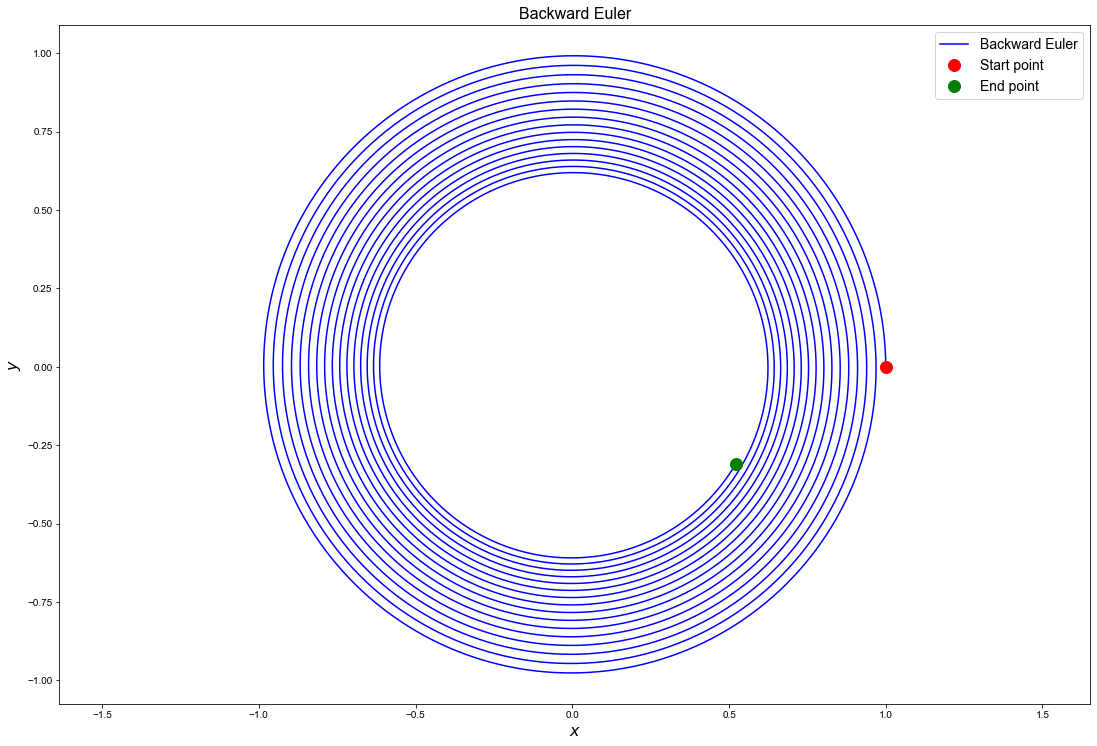

In [5]:
def jacobian(f, x, dx):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(x)
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(x_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
    return J


def newton_system_numdif(f, x, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, x, h)
        dx = sl.solve(J, -f(x))
        x += dx
        if sl.norm(dx, np.inf) < atol:
            return x

        
def Backward_euler(f, u0, t0, t_max, dt):

    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    
    while t < t_max:
        
        guess = np.array(u0)           
        def F(guess):
            return guess - u - dt * f(t+dt, guess)
        u = newton_system_numdif(F, guess, h=1.0e-4, atol=1.0e-6, max_its=100)  
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)


def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f


dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.


fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
fig.tight_layout(w_pad=4)

u, t = Backward_euler(f, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Backward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)

### (2) 
### Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

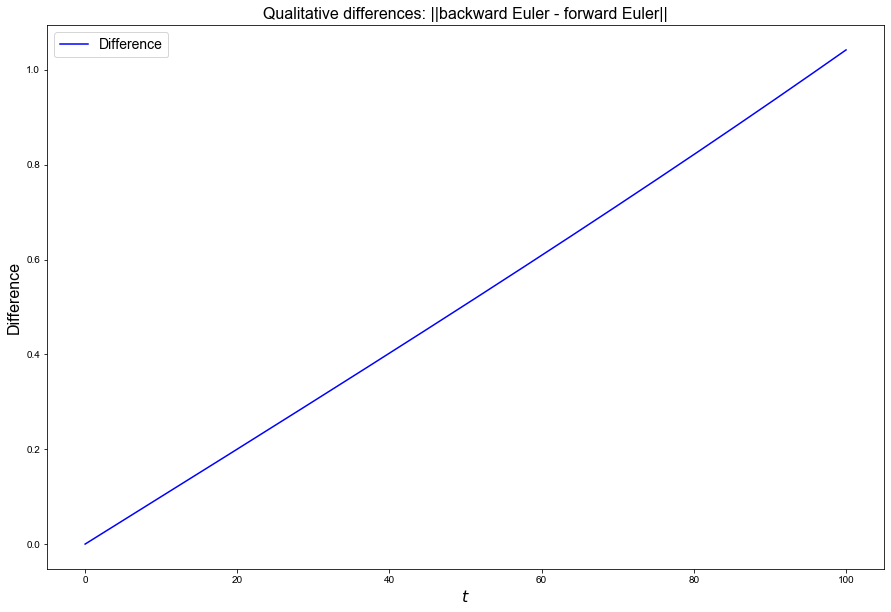

In [6]:
def Forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

u1, t1 = Forward_euler(f, u0, t0, tf, dt)
ax1.plot(t, np.linalg.norm(u - u1, axis=1), 'b', label='Difference')

ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Qualitative differences: ||backward Euler - forward Euler||', fontsize = 16)
ax1.legend(loc='best', fontsize=14)

#### " Comments: "
####  The qualitative differences curve between these two methods approximating a linear function.

### (3)
### Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler.

" Answer: "

We can write implicit two-level scheme (trapezoidal) as: $$y_{n+1} -\frac{\Delta t}{2}f(t_{n+1},y_{n+1})- y_{n} -\frac{\Delta t}{2}f(t_{n},y_{n}) = 0$$

However, it is difficult for us to obtain $y_{n+1}$ directly as the method is implicit when we just input  $y_{n}$.
 
Therefore, we can define: $$F(y^{k+1}) = y^{k+1} -\frac{\Delta t}{2}f(t^{k+1},y^{k+1})- y^{k} -\frac{\Delta t}{2}f(t^{k},y^{k})$$ 
$$J(y^{k+1}) = I -\frac{\Delta t}{2}J(t^{k+1},y^{k+1})$$

Now suppose we have a guess solution $y^{k+1}$ in our iteration and we want an updated (hopefully improved) value $y^{k+2}$, which is a real solution to $y_{n+1}$. 

The Taylor series analysis tells us that:  $$F(y^{k+2}) = F(y^{k+1}) + J(y^{k+1})(y^{k+2} - y^{k+1})$$

As before, we want $F(y^{k+2})\approx{0}$ so specify this in the above to yield: $$ J(y^{k+1})(y^{k+2} - y^{k+1}) = -F(y^{k+1})$$

or with the notation $\Delta y^{k+1} := y^{k+2} - y^{k+1}$ if we can solve: 

$$J(y^{k+1})\Delta y^{k+1} = -F(y^{k+1})$$

We could of course also have just written: $$y^{k+2} = y^{k+1} - [J(y^{k+1})]^{-1} F(y^{k+1})$$ 
$$y^{k+2} = y^{k+1} - [I - \frac{\Delta t}{2}J(t^{k+1},y^{k+1})]^{-1} F(y^{k+1})$$ 

We can get $y^{k+2}$ (a real solution to $y_{n+1}$) by selecting $y^{k+1}$ as "guess".

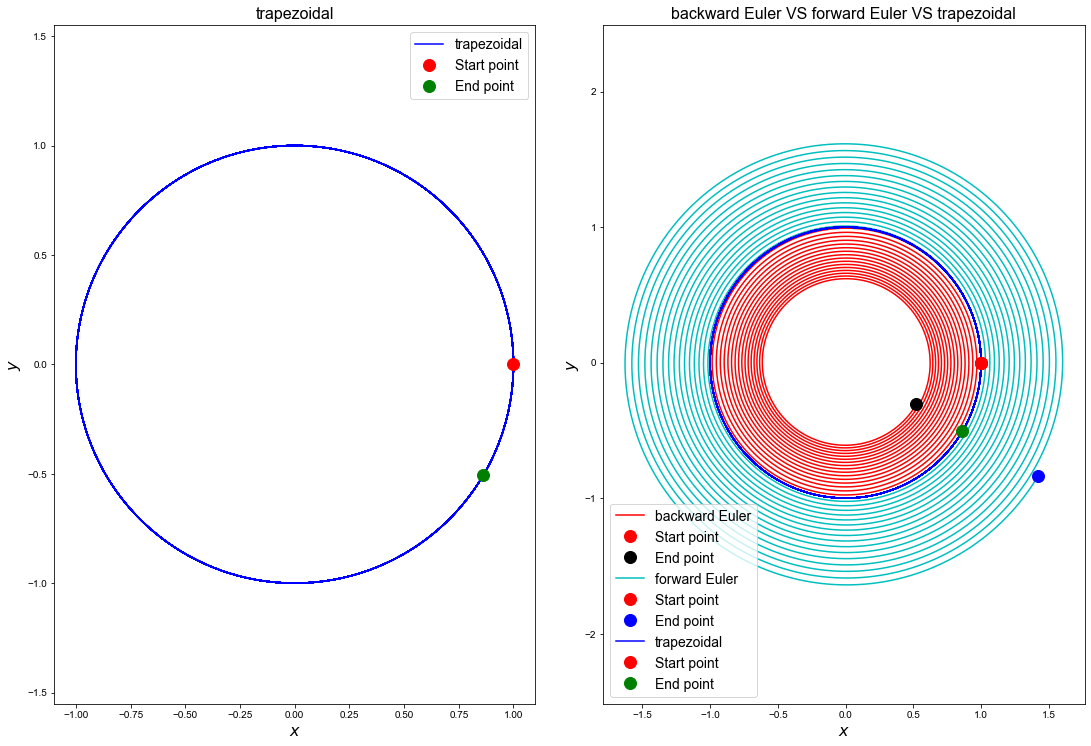

In [7]:
def jacobian(f, x, dx):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(x)
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(x_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
    return J


def newton_system_numdif(f, x, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, x, h)
        dx = sl.solve(J, -f(x))
        x += dx
        if sl.norm(dx, np.inf) < atol:
            return x


def trapezoidal(f, u0, t0, t_max, dt):

    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    
    while t < t_max:
        
        guess = np.array(u0)           
        def F(guess):
            return guess - (1/2) * dt * f(t + dt, guess) - u - (1/2) * dt * f(t, u) 
        u = newton_system_numdif(F, guess, h=1.0e-4, atol=1.0e-6, max_its=100) 
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f


dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout(w_pad=4)

u2, t2 = trapezoidal(f, u0, t0, tf, dt)
ax1.plot(u2[:,0], u2[:,1], 'b', label='trapezoidal')
ax1.plot(u2[0,0], u2[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u2[-1,0], u2[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('trapezoidal', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)




ax2.plot(u[:,0], u[:,1], 'r', label='backward Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'ko', label='End point', markersize=12)

ax2.plot(u1[:,0], u1[:,1], 'c', label='forward Euler')
ax2.plot(u1[0,0], u1[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u1[-1,0], u1[-1,1], 'bo', label='End point', markersize=12)

ax2.plot(u2[:,0], u2[:,1], 'b', label='trapezoidal')
ax2.plot(u2[0,0], u2[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u2[-1,0], u2[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('backward Euler VS forward Euler VS trapezoidal', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)

#### "Comments" 
#### From the RHS graph we could see that "two-level scheme (trapezoidal)" provides qualitatively improved results compared with both forward and backward Euler.¶

### (4)
### Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.

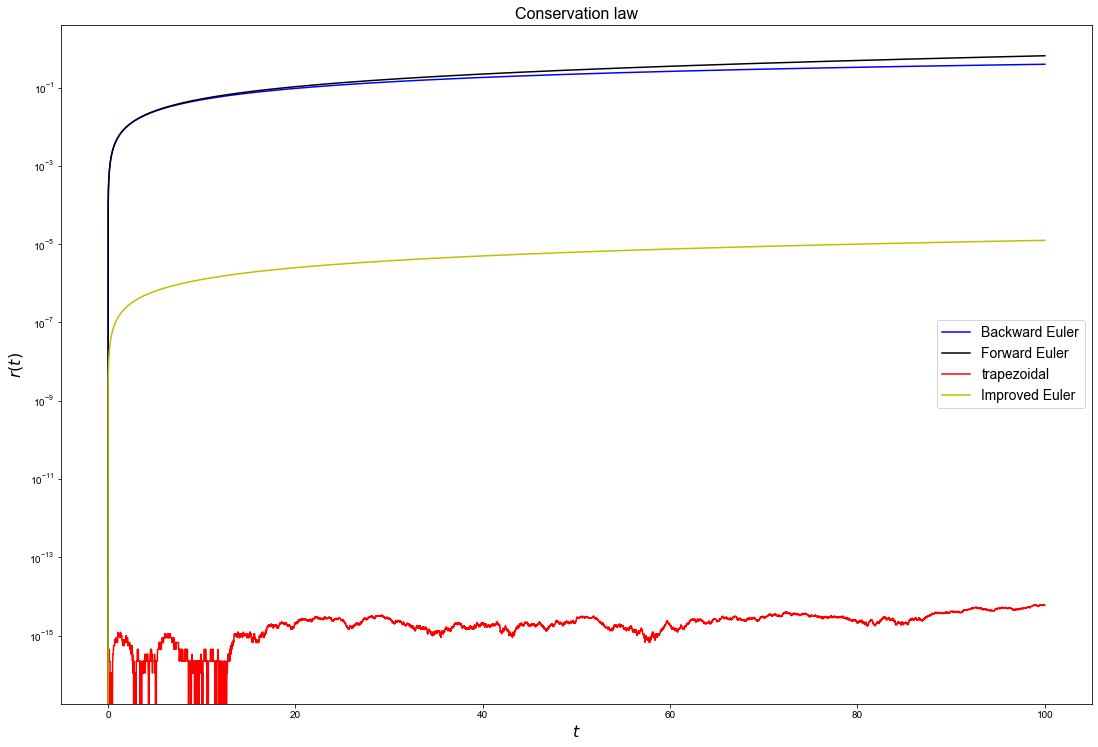

In [8]:
def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        star = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, star) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)


ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Backward Euler')

ax1.semilogy(t1, np.abs(np.sqrt(u1[:,0]**2 + u1[:,1]**2) - np.sqrt(u1[0,0]**2 + u1[0,1]**2)), 'k', label='Forward Euler')

ax1.semilogy(t2, np.abs(np.sqrt(u2[:,0]**2 + u2[:,1]**2) - np.sqrt(u2[0,0]**2 + u2[0,1]**2)), 'r', label='trapezoidal')

u3, t3 = improved_euler(f, u0, t0, tf, dt)
ax1.semilogy(t3, np.abs(np.sqrt(u3[:,0]**2 + u3[:,1]**2) - np.sqrt(u3[0,0]**2 + u3[0,1]**2)), 'y', label='Improved Euler')

ax1.legend(loc='best', fontsize=14)

#### "Comments" 
####  the solution should respect  the "mathematical conservation law" in time.  $$ r(t):=\sqrt{x(t)^2+ (t)^2}=r(0)$$
#### We could just check the error shown on the y_label $(r(t))$. When t tends to infinity, if the displayed error is  small, which means $r(t) \approx r(0)$ and this kind of method satisfies "mathematical conservation law".
#### The two-level scheme (trapezoidal) shows minimal fluctuation error, thus it meets the law better than the other methods.
#### With regards to Improved Euler, it is second only to trapezoidal in terms of error accuracy.
#### While for backward and forward Euler, both of them display similar error. However, the forward Euler shows greater error than backward Euler in the long term.

## Coursework Q3 
## Steady-state advection-diffusion with the FEM

### (1)

### In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.

### Using the finite element method formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below).

### The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

"Answer"

Define $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$  
$$-u'' = -\frac{UL}{kappa}*u' = - {Pe}*u'$$

<br>

with inhomogeneous Dirichlet boundary conditions: 
$$u(0) = u_L\;\;\;\; u(1) = u_R$$
$$u_L = 0\;\;\;\; u_R = CE$$

<br>

In this case we integrate by parts:
$$-\int_0^1 u''\,v \,dx = \int_0^1 - {Pe}*u'\,v \,dx$$
$$\left[-u'(x)\,v(x)\right]_0^1 + \int_0^1 u'(x)\,v'(x) \,dx = \left[-Pe*u(x)\,v(x)\right]_0^1 + \int_0^1 Pe*u(x)\,v'(x) \,dx$$

<br>

We look for a solution to our problem in the space of p/w linear functions which are zero at the boundaries:
$$V_h^0 := \left\{v \in V_h \,|\, v(0)=v(1)=0\right\}.$$

<br>

This means that $$\left[-u'(x)\,v(x)\right]_0^1=0 \;\;\;\; \left[-Pe*u(x)\,v(x)\right]_0^1=0$$

<br>

Thus the formula can be simplified into $$\int_0^1 u'(x)\,v'(x) \,dx = \int_0^1 Pe*u(x)\,v'(x) \,dx$$

<br>

In this case we write our solution as
$$u_h := \sum_{j=0}^{n} u_j\,\phi_j 
= \sum_{j=1}^{n-1} u_j\,\phi_j + u_0\,\phi_0 + u_n\,\phi_n$$

This means that it is still appropriate for us to use the reduced space $V_h^0$ to test our solution against, i.e. we again ignore the boundary terms in the weak form and ask that
$$\int_0^1 u_h'\,\phi_i' \,dx 
= \int_0^1 Pe*u_h\,\phi_i' \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1. $$

<br>

In this case the integral in the LHS can be written as 
\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \,\left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=0}^{n} u_j\, \int_0^1 \,\phi_j'\,\phi_i' \,dx \\[10pt]
&= 
\sum_{j=1}^{n-1} u_j\, \int_0^1 \phi_i'\, \phi_j' \,dx 
+u_0\, \int_0^1 \phi_i'\, \phi_0' \,dx
+u_n\, \int_0^1 \phi_i'\, \phi_n' \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1.
\end{align*}

<br>

Meanwhile, the integral in the RHS can be written as 
\begin{align*}
\int_0^1 Pe*u_h\phi_i' \,dx 
&= 
\int_0^1 Pe\,\left(\sum_{j=0}^{n} u_j\,\phi_j\right)\phi_i' \,dx \\[10pt]
&= 
Pe\,\sum_{j=0}^{n} u_j\, \int_0^1 \,\phi_j\,\phi_i' \,dx \\[10pt]
&= 
Pe\,\sum_{j=1}^{n-1} u_j\, \int_0^1 \phi_i'\, \phi_j \,dx 
+Pe*u_0\, \int_0^1 \phi_i'\, \phi_0 \,dx
+Pe*u_n\, \int_0^1 \phi_i'\, \phi_n \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1.
\end{align*}

<br>

Thus the formula can be simplified into
$$\int_0^1 u_h'\,\phi_i' \,dx -\int_0^1 Pe*u_h\,\phi_i' \,dx = 0 \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1.$$
$$\sum_{j=1}^{n-1} u_j\, [\int_0^1 \phi_i'\, \phi_j' \,dx - Pe\,\int_0^1 \phi_i'\, \phi_j \,dx] = u_0\, [Pe\,\int_0^1 \phi_i'\, \phi_0 \,dx - \int_0^1 \phi_i'\, \phi_0' \,dx] + u_n\, [Pe\,\int_0^1 \phi_i'\, \phi_n \,dx - \int_0^1 \phi_i'\, \phi_n' \,dx]$$

<br>

We now introduce the notation for the "discretisation" matrix
$$ K_{ij}^{*} = \int_0^1 \phi_i'\, \phi_j' \,dx - Pe\,\int_0^1 \phi_i'\, \phi_j \,dx$$

<br>

and the RHS vector
$$ b_i = u_0\, [Pe\,\int_0^1 \phi_i'\, \phi_0 \,dx - \int_0^1 \phi_i'\, \phi_0' \,dx] + u_n\, [Pe\,\int_0^1 \phi_i'\, \phi_n \,dx - \int_0^1 \phi_i'\, \phi_n' \,dx]$$

<br>

Our discretised system can now be written as
$$\sum_{j=1}^{n-1} u_j\, K_{ij}^{*} = b_i$$
$$K^{*}\boldsymbol{u} = \boldsymbol{b}$$

<br>

If we solve this matrix equation for the vector of coefficients  𝑢  then we have a numerical solution to our problem.

<br>

Recall that our basis functions are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

and so their derivatives are simply

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

i.e. they are constant within elements.

<br>

$$\text{for}\;\;\;\; i=1, 2,\ldots, n-1$$
<br>
$$\int_0^1 \phi_i'\, \phi_i' \,dx = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}\;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i-1}' \,dx = \frac{-1}{\Delta x_{i-1}}\;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i+1}' \,dx = \frac{-1}{\Delta x_{i}}$$
<br>
$$\int_0^1 \phi_i'\, \phi_i \,dx = 0 \;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i-1} \,dx = \frac{1}{2} \;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i+1} \,dx = -\frac{1}{2}$$
<br>
$$\int_0^1 \phi_1'\, \phi_{0}' \,dx = \frac{-1}{\Delta x_{0}} \;\;\;\;\; \int_0^1 \phi_{n-1}'\, \phi_{n}' \,dx = \frac{-1}{\Delta x_{n-1}}$$
<br>
$$\int_0^1 \phi_1'\, \phi_{0} \,dx = \frac{1}{2} \;\;\;\;\;  \int_0^1 \phi_{n-1}'\, \phi_{n} \,dx = -\frac{1}{2}$$

<br>

For the "discretisation" matrix
$$ K_{i,i}^{*} = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}$$
<br>
$$ K_{i,i+1}^{*} = \frac{-1}{\Delta x_{i}}+ \frac{Pe}{2}$$
<br>
$$ K_{i,i-1}^{*} = \frac{-1}{\Delta x_{i-1}}- \frac{Pe}{2}$$
 
<br>

For the RHS vector
$$ b_1 = u_0\, [Pe\,\frac{1}{2} - (\frac{-1}{\Delta x_{0}})] =\frac{u_0*Pe}{2} + \frac{u_0}{\Delta x_{0}} =\frac{u_L*Pe}{2} + \frac{u_L}{\Delta x_{0}}$$
<br>
$$ b_{n-1} = u_n\, [Pe\,(\frac{-1}{2}) - (\frac{-1}{\Delta x_{n-1}})] =-\frac{u_n*Pe}{2} + \frac{u_n}{\Delta x_{n-1}} =-\frac{u_R*Pe}{2} + \frac{u_R}{\Delta x_{n-1}}$$

error (RMS at nodes only) =  0.0062669956712679145


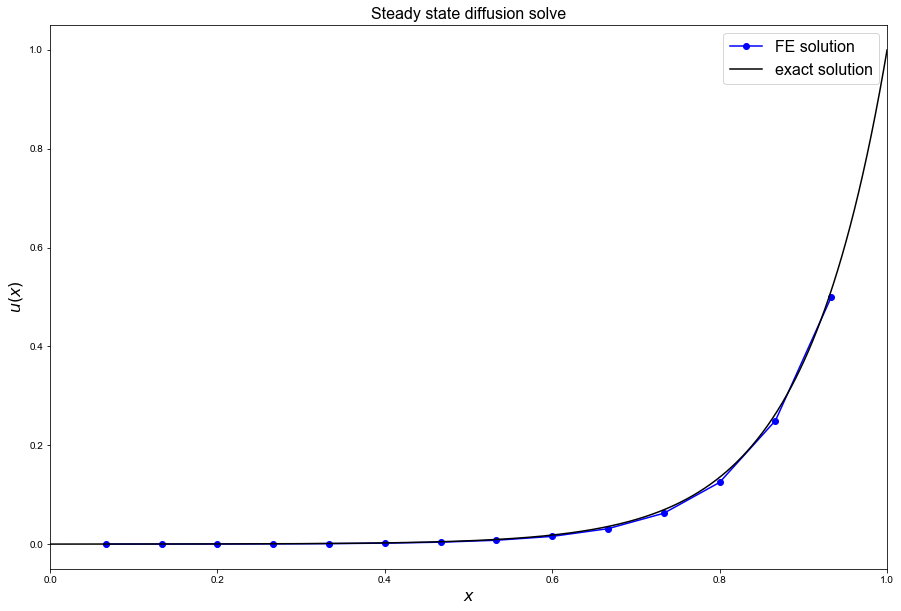

In [9]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

uL = 0
uR = CE

def f(x):
    return 0.0

def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

N_elements_CG = 15
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1] + Pe/2   , k=-1) \
    - np.diag(1. / dx[1:-1] - Pe/2  , k=1)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    
# Add in the extra entries due to the inhomogeneous BCs

# At the left the integral is only non-zero when phi_i and phi_0 both have
# support - this only occurs over the first element when i=1 (remembering that i=0
# isn't in our trial space. The integrand is then
# uL multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
# multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
# This is a constant, and hence to do the integral we just need to 
# multiply by the size of the cell (dx[0]):
RHS[0] = RHS[0] + uL * Pe/2 - (uL * 1/dx[0] * (-1/dx[0]))*dx[0]
# and similarly for the RHS
RHS[-1] = RHS[-1] - uR * Pe/2 - (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1]

u = sl.solve(K,RHS)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

ax1.set_xlim(0, 1);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )


In [10]:
print(x_nodes[1:-1],len(x_nodes[1:-1]))
print(x_nodes, len(x_nodes))

[0.06666667 0.13333333 0.2        0.26666667 0.33333333 0.4
 0.46666667 0.53333333 0.6        0.66666667 0.73333333 0.8
 0.86666667 0.93333333] 14
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ] 16


### (2)
###  Do you observe the expected order of convergence?

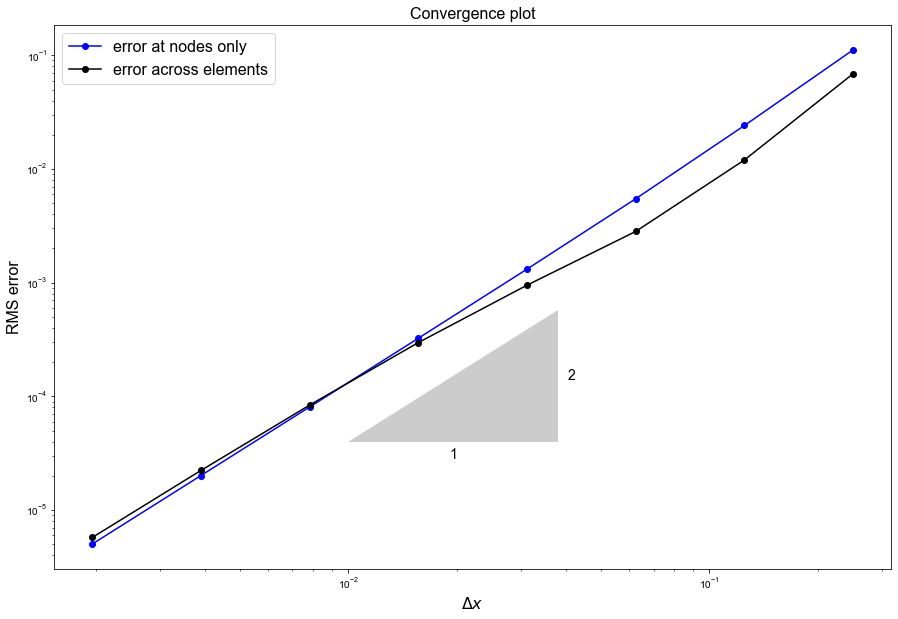

In [11]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

uL = 0
uR = CE

def f(x):
    return 0.0

def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        #print(node)
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        
        
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

# some meshes of increasingly finer resolution to loop over
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1] + Pe/2   , k=-1) \
    - np.diag(1. / dx[1:-1] - Pe/2  , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
    
    RHS[0] = RHS[0] + uL * Pe/2 - (uL * 1/dx[0] * (-1/dx[0]))*dx[0]
    
    RHS[-1] = RHS[-1] - uR * Pe/2 - (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1]
    
    u = sl.solve(K,RHS)

    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

#### "Comments" 
#### From the graph we can see that our solver is 2nd order accurate in terms of the nodal values.

### (3)
###  Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

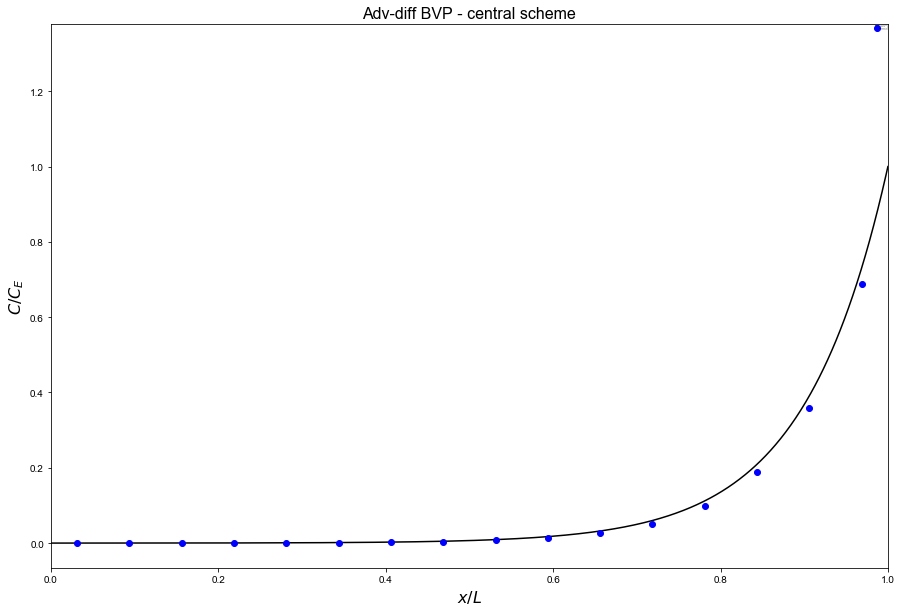

In [12]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 16)

# construct the exact solution
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=1)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

In [13]:
print(x,len(x))

[-0.03125  0.03125  0.09375  0.15625  0.21875  0.28125  0.34375  0.40625
  0.46875  0.53125  0.59375  0.65625  0.71875  0.78125  0.84375  0.90625
  0.96875  1.03125] 18
